In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from sys import getsizeof
import matplotlib.pyplot as plt

img = plt.imread(r"C:\Users\AsiaLapTop.Com\Downloads\Telegram Desktop\First session-python\First session\pics\lena_color_512.tif")

print("shape of image:", img.shape)
print("type of elems of image:", img.dtype)

gray_img = img[:, :, 0]
print("shape of grayscale image:", gray_img.shape)

print("size of image:", getsizeof(img) / 1024 / 1024, "MB")
print("size of grayscale image:", getsizeof(gray_img) / 1024 / 1024, "MB")


shape of image: (512, 512, 3)
type of elems of image: uint8
shape of grayscale image: (512, 512)
size of image: 0.0001373291015625 MB
size of grayscale image: 0.0001220703125 MB


In [4]:
half_gray_img = gray_img[:, gray_img.shape[1] // 2:]

In [5]:
flipped_img = np.flip(half_gray_img, axis=0)

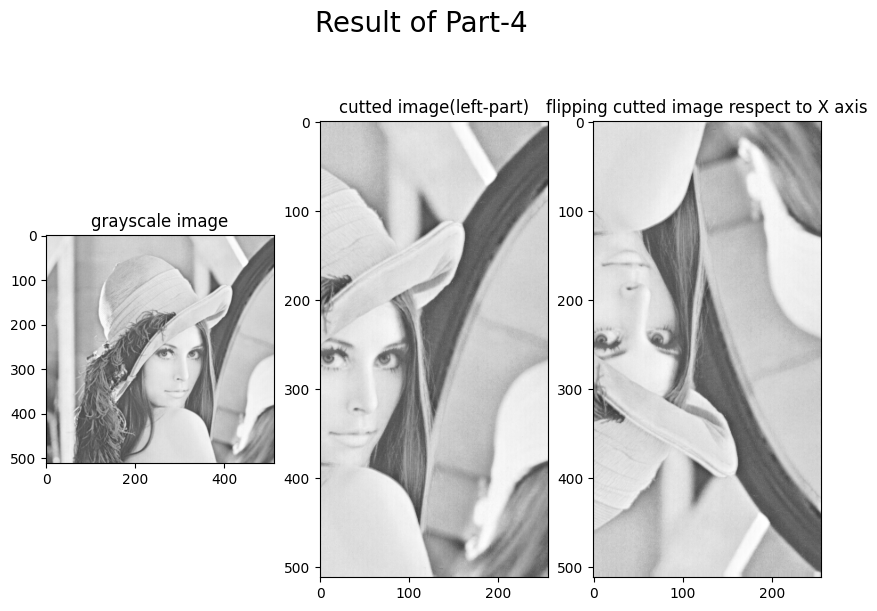

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(10, 7))
ax[0].imshow(gray_img, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("grayscale image")
ax[1].imshow(half_gray_img, cmap="gray", vmin=0, vmax=255)
ax[1].set_title("cutted image(left-part)")
ax[2].imshow(flipped_img, cmap="gray", vmin=0, vmax=255)
ax[2].set_title("flipping cutted image respect to X axis")
fig.suptitle("Result of Part-4", fontsize=20)
plt.show()

Read Dicom images

In [8]:
pip install matplotlib numpy pydicom opencv-python pillow

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 187.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 361.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.4 MB 563.7 kB/s eta 0:00:05
   - -------------------------------------- 0.1/2.4 MB 585.1 kB/s eta 0:00:04
   --- ------------------------------------

ERROR: THESE PACKAGES DO NOT MATCH THE HASHES FROM THE REQUIREMENTS FILE. If you have updated the package versions, please update the hashes. Otherwise, examine the package contents carefully; someone may have tampered with them.
    unknown package:
        Expected sha256 d98edb20aa932fd8ebd276a72627dad9dc097695b3d435a4257557bbb49a79d2
             Got        c23eedb958eb5721b7cf995459f5aff37024e81d8878d89ff5bac007a5fd1721


[notice] A new release of pip is available: 24.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install matplotlib numpy pydicom opencv-python pillow

  Using cached pydicom-3.0.1-py3-none-any.whl.metadata (9.4 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached pydicom-3.0.1-py3-none-any.whl (2.4 MB)
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB 279.3 kB/s eta 0:02:20
   ---------------------------------------- 0.1/39.0 MB 465.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/39.0 MB 465.5 kB/s eta 0:01:24
   ---------------------------------------- 0.1/39.0 MB 435.7 kB/s eta 0:01:30
   ---------------------------------------- 0.2/39.0 MB 510.2 kB/s 

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pydicom as dicom
import cv2 as cv
from PIL import Image

In [12]:
# read file
dc = dicom.dcmread(r"C:\Users\AsiaLapTop.Com\Downloads\Telegram Desktop\First session-python\First session\pics\IMG-0001-00001.dcm")


In [13]:
dc.Modality

'MR'

In [14]:
# answer:
print(dc[("0028", "0100")])
print(dc[("0028", "0101")])
print(dc[("0018", "0015")])
# print(dc[("0008", "0016")])

(0028,0100) Bits Allocated                      US: 16
(0028,0101) Bits Stored                         US: 12
(0018,0015) Body Part Examined                  CS: 'BRAIN'


In [15]:
image = dc.pixel_array
print('maximum value in image is: ', image.max())
print('minimum value in image is: ', image.min())

maximum value in image is:  1516
minimum value in image is:  0


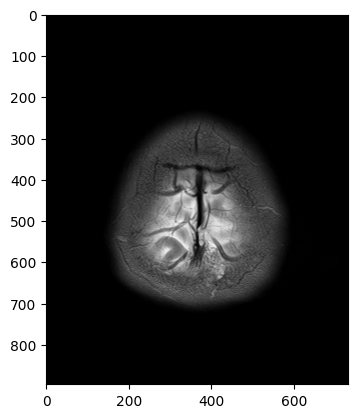

In [16]:
normalized_image = (image - np.min(image)) / (np.max(image) - np.min(image))
plt.imshow(normalized_image[0], cmap='gray')
plt.show()

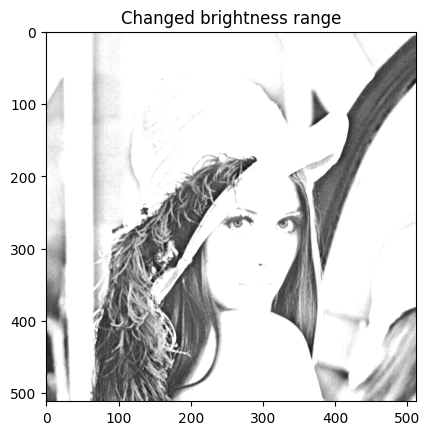

In [17]:
# Change brightness range of grayscale image
# تغییر محدوده‌ی روشنایی تصویر خاکستری

plt.imshow(gray_img, cmap="gray", vmin=50, vmax=180)
plt.title("Changed brightness range")
plt.show()

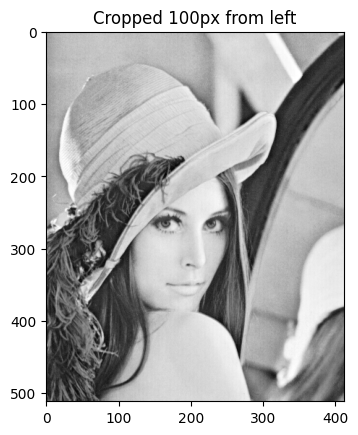

In [18]:
# Crop 100 pixels from left side
# بریدن 100 پیکسل از سمت چپ تصویر

cropped_img = gray_img[:, 100:]
plt.imshow(cropped_img, cmap="gray")
plt.title("Cropped 100px from left")
plt.show()

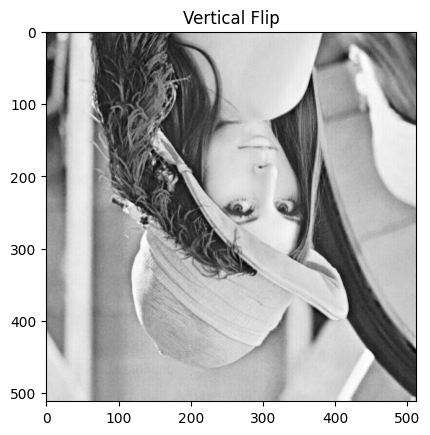

In [19]:
# Flip image vertically (up-down)
# وارونه کردن تصویر در جهت عمودی

flip_vertical = np.flip(gray_img, axis=0)
plt.imshow(flip_vertical, cmap="gray")
plt.title("Vertical Flip")
plt.show()


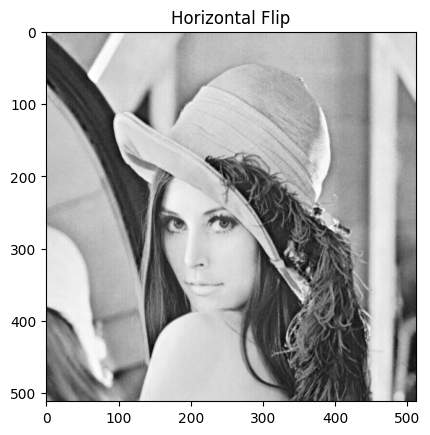

In [20]:
# Flip image horizontally (left-right)
# وارونه کردن تصویر در جهت افقی

flip_horizontal = np.flip(gray_img, axis=1)
plt.imshow(flip_horizontal, cmap="gray")
plt.title("Horizontal Flip")
plt.show()


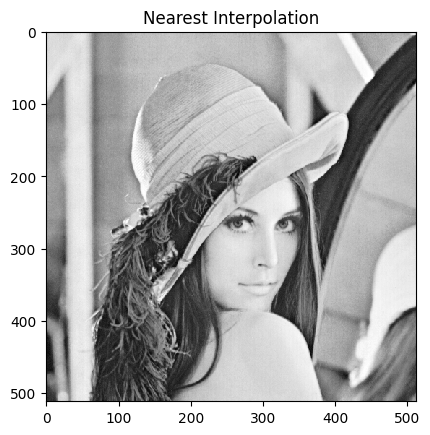

In [21]:
# Show image with nearest interpolation
# نمایش تصویر با اینترپولیشن nearest

plt.imshow(gray_img, cmap="gray", interpolation="nearest")
plt.title("Nearest Interpolation")
plt.show()


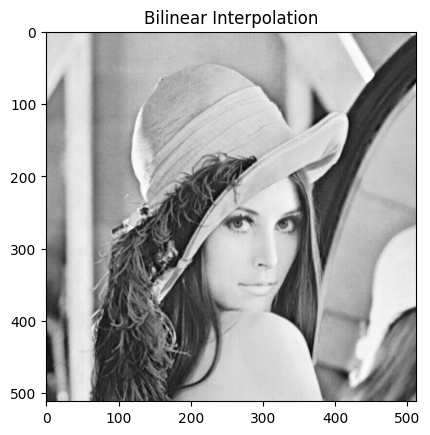

In [22]:
# Show image with bilinear interpolation
# نمایش تصویر با اینترپولیشن bilinear

plt.imshow(gray_img, cmap="gray", interpolation="bilinear")
plt.title("Bilinear Interpolation")
plt.show()


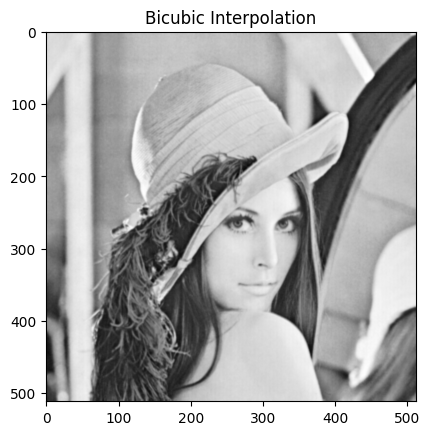

In [23]:
# Show image with bicubic interpolation
# نمایش تصویر با اینترپولیشن bicubic

plt.imshow(gray_img, cmap="gray", interpolation="bicubic")
plt.title("Bicubic Interpolation")
plt.show()


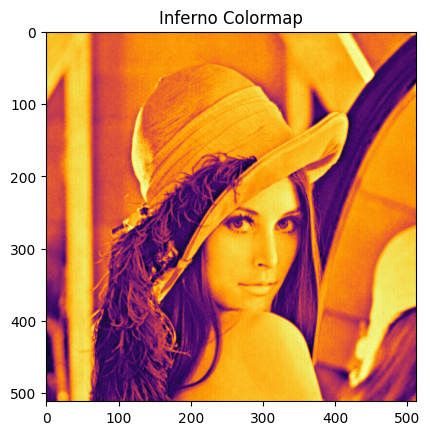

In [30]:
# Display image using 'inferno' colormap
# نمایش تصویر با colormap به نام inferno

plt.imshow(gray_img, cmap="inferno")
plt.title("Inferno Colormap")
plt.show()
